# Data Science Case Study
### Analyzing data derived from gaming industry
### Full Data Science Tutorial

In [1]:
import os
import mysql.connector

#### Importing the Data

In [6]:
#connection data

In [5]:
curs = connection.cursor()
curs.execute("SELECT * FROM wow_combat_log_1")
results = curs.fetchall()
print(results[:20])

[('Attumen the Huntsman', '2021-11-17 23:19:39.652', 'SWING_DAMAGE', 'Damage', 'Midnight', 0, 'Laverys', 1, 'Auto Attack', '4071', 4071, 'Normal', 0, 1, 1), ('Attumen the Huntsman', '2021-11-17 23:19:39.652', 'SPELL_DAMAGE', 'Damage', 'Laverys', 1, 'Midnight', 0, 'Exorcism', '876', 876, 'Normal', 1, 1, 2), ('Attumen the Huntsman', '2021-11-17 23:19:39.670', 'SWING_DAMAGE', 'Damage', 'Lollitta', 1, 'Midnight', 0, 'Auto Attack', '305', 305, 'Normal', 0, 1, 3), ('Attumen the Huntsman', '2021-11-17 23:19:39.670', 'SWING_DAMAGE', 'Damage', 'Lollitta', 1, 'Midnight', 0, 'Auto Attack', '372', 372, 'Normal', 0, 1, 4), ('Attumen the Huntsman', '2021-11-17 23:19:40.135', 'SWING_DAMAGE', 'Damage', 'Maulgrab', 1, 'Midnight', 0, 'Auto Attack', '261', 261, 'Glancing Blow', 0, 1, 5), ('Attumen the Huntsman', '2021-11-17 23:19:40.582', 'SPELL_DAMAGE', 'Damage', 'Lollitta', 1, 'Midnight', 0, 'Devastate', '160', 160, 'Normal', 1, 1, 6), ('Attumen the Huntsman', '2021-11-17 23:19:41.647', 'SWING_DAMAGE',

In [4]:
curs.execute("DESCRIBE wow_combat_log_1;")
results = curs.fetchall()
print(results)

[('encounter_name', b'varchar(50)', 'YES', '', None, ''), ('event_timestamp', b'varchar(50)', 'YES', '', None, ''), ('event_type', b'varchar(50)', 'YES', '', None, ''), ('category', b'varchar(50)', 'YES', '', None, ''), ('source_name', b'varchar(50)', 'YES', '', None, ''), ('source_is_human', b'tinyint(1)', 'YES', '', None, ''), ('dest_name', b'varchar(50)', 'YES', '', None, ''), ('dest_is_human', b'tinyint(1)', 'YES', '', None, ''), ('spell_name', b'varchar(50)', 'YES', '', None, ''), ('amount', b'varchar(50)', 'YES', '', None, ''), ('raw_amount', b'int unsigned', 'YES', '', None, ''), ('combat_event', b'varchar(20)', 'YES', '', None, ''), ('special', b'tinyint(1)', 'YES', '', None, ''), ('overkill', b'tinyint(1)', 'YES', '', None, ''), ('rowID', b'int unsigned', 'NO', 'PRI', None, 'auto_increment')]


In [5]:
curs.execute("SHOW columns FROM wow_combat_log_1;")
results = curs.fetchall()
columns = []
for result in results:
    print(result)
    columns.append(result[0])

('encounter_name', b'varchar(50)', 'YES', '', None, '')
('event_timestamp', b'varchar(50)', 'YES', '', None, '')
('event_type', b'varchar(50)', 'YES', '', None, '')
('category', b'varchar(50)', 'YES', '', None, '')
('source_name', b'varchar(50)', 'YES', '', None, '')
('source_is_human', b'tinyint(1)', 'YES', '', None, '')
('dest_name', b'varchar(50)', 'YES', '', None, '')
('dest_is_human', b'tinyint(1)', 'YES', '', None, '')
('spell_name', b'varchar(50)', 'YES', '', None, '')
('amount', b'varchar(50)', 'YES', '', None, '')
('raw_amount', b'int unsigned', 'YES', '', None, '')
('combat_event', b'varchar(20)', 'YES', '', None, '')
('special', b'tinyint(1)', 'YES', '', None, '')
('overkill', b'tinyint(1)', 'YES', '', None, '')
('rowID', b'int unsigned', 'NO', 'PRI', None, 'auto_increment')


In [6]:
def insert(values):
    try:
        with mysql.connector.connect(**connection_data) as conn:
            curs = conn.cursor()
            curs.execute("SHOW columns FROM wow_combat_log_1;")
            results = curs.fetchall()
            columns = [result[0] for result in results]
            placeholders = ', '.join(['%s']*len(columns))
            columns = ', '.join(columns)
            sql = """INSERT INTO wow_combat_log_1 ({:s}) VALUES ({:s});""".format(columns,placeholders)
            curs.execute(sql,values)
            conn.commit()
            return True
    except mysql.connector.Error as error:
        print('Request failed due to the following error:')
        print(error)

In [7]:
import pandas as pd

In [8]:
df = pd.read_sql("SELECT * FROM wow_combat_log_1", con = connection)
df.head()

,encounter_name,event_timestamp,event_type,category,source_name,source_is_human,dest_name,dest_is_human,spell_name,amount,raw_amount,combat_event,special,overkill,rowID
0,Attumen the Huntsman,2021-11-17 23:19:39.652,SWING_DAMAGE,Damage,Midnight,0.0,Laverys,1.0,Auto Attack,4071,4071.0,Normal,0.0,1.0,1
1,Attumen the Huntsman,2021-11-17 23:19:39.652,SPELL_DAMAGE,Damage,Laverys,1.0,Midnight,0.0,Exorcism,876,876.0,Normal,1.0,1.0,2
2,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,1.0,Midnight,0.0,Auto Attack,305,305.0,Normal,0.0,1.0,3
3,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,1.0,Midnight,0.0,Auto Attack,372,372.0,Normal,0.0,1.0,4
4,Attumen the Huntsman,2021-11-17 23:19:40.135,SWING_DAMAGE,Damage,Maulgrab,1.0,Midnight,0.0,Auto Attack,261,261.0,Glancing Blow,0.0,1.0,5


In [9]:
#number of rows
len(df)

14371

In [10]:
####FIND ALL ENCOUNTER NAMES, SOURCE NAMES
encounter_names = df['encounter_name'].unique()
encounter_names

array(['Attumen the Huntsman', 'Moroes', 'Maiden of Virtue', 'Opera Hall',
       'Nightbane', 'The Curator', 'Terestian Illhoof',
       'Prince Malchezaar', None], dtype=object)

In [11]:
players = df['source_name'][df['source_is_human'] == 1].unique()
players.sort()
players

array(['Epicz', 'Gobachi', 'Laverys', 'Lollitta', 'Maulgrab', 'Mongollan',
       'Mtbalrog', 'PiontyllerÃ¶', 'Slako', 'Trashcane'], dtype=object)

In [12]:
####Searching for Nulls
bools = df.isnull()
bools

,encounter_name,event_timestamp,event_type,category,source_name,source_is_human,dest_name,dest_is_human,spell_name,amount,raw_amount,combat_event,special,overkill,rowID
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14366,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
14367,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
14368,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
14369,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False


In [13]:
df.isnull().values.any()

True

In [14]:
###REMOVE NULLS
df.dropna(how='any',inplace=True)

In [15]:
df.isnull().values.any()

False

In [16]:
len(df)

14350

### Data Wrangling

#### Data Formating

In [17]:
##### FIND TOTAL DAMAGE PER PLAYER PER ENCOUNTER
df_collection = dict()
for encounter in encounter_names:
    df_collection.update({
        encounter:df[(df['source_is_human']== 1) & (df['encounter_name'] == encounter)][
            ['source_name','amount']].groupby('source_name').sum()})
df_collection

{'Attumen the Huntsman':                                                          amount
 source_name                                                    
 Epicz         1000178476003570357001057108411141160115420071...
 Gobachi       3832376293614329751943191418941885112116633523...
 Laverys       8760217005741631951271360671361331361331368713...
 Lollitta      3053721604642922340261321408384524698294033745...
 Maulgrab      2613290341018613597372980161144983450308199177...
 Mongollan     1826176914003198369216631486293283916811513149...
 Mtbalrog      6023082419326123628983352922335618335336167455...
 PiontyllerÃ¶                                               1035
 Slako                                             6081202201603
 Trashcane     4265230169653243555027233355055044354343151454...,
 'Moroes':                                                          amount
 source_name                                                    
 Epicz         1529890875811696012477001200690152801451

In [18]:
###???????????????? -> CHECK THE TYPES!!!! (FORMAT)
df['amount'] = df['amount'].astype('int')
df['raw_amount'] = df['raw_amount'].astype('int')
df['source_is_human'] = df['source_is_human'].astype('bool')
df['dest_is_human'] = df['dest_is_human'].astype('bool')

In [19]:
encounter_names = df['encounter_name'].unique()
encounter_names

array(['Attumen the Huntsman', 'Moroes', 'Maiden of Virtue', 'Opera Hall',
       'Nightbane', 'The Curator', 'Terestian Illhoof',
       'Prince Malchezaar'], dtype=object)

In [20]:
from collections import OrderedDict

In [21]:
df_collection = OrderedDict()
for encounter in encounter_names:
    fight_data = df[(df['source_is_human']== 1) & (df['encounter_name'] == encounter)][
            ['source_name','amount']].groupby('source_name').sum()/1000.0
    fight_data = fight_data.sort_values('amount',ascending=False)
    df_collection.update({
        encounter:fight_data})
df_collection

OrderedDict([('Attumen the Huntsman',
                             amount
              source_name          
              Mongollan     118.253
              Mtbalrog      114.080
              Epicz          93.859
              Maulgrab       87.863
              Gobachi        85.693
              Trashcane      83.084
              Lollitta       52.585
              Laverys        26.966
              PiontyllerÃ¶    1.035
              Slako           0.067),
             ('Moroes',
                             amount
              source_name          
              Epicz         121.395
              Mtbalrog      110.587
              Maulgrab       92.834
              Gobachi        76.479
              Mongollan      71.382
              Trashcane      66.409
              Laverys        62.843
              Lollitta       43.237
              PiontyllerÃ¶    0.247),
             ('Maiden of Virtue',
                           amount
              source_name        
    

In [22]:
size = len(df_collection)
size #number of encounters

8

In [23]:
import matplotlib.pyplot as plt
import mplcyberpunk
%matplotlib inline
plt.style.use('cyberpunk')

In [24]:
for key , value in df_collection.items():
    print(key,value)

Attumen the Huntsman                amount
source_name          
Mongollan     118.253
Mtbalrog      114.080
Epicz          93.859
Maulgrab       87.863
Gobachi        85.693
Trashcane      83.084
Lollitta       52.585
Laverys        26.966
PiontyllerÃ¶    1.035
Slako           0.067
Moroes                amount
source_name          
Epicz         121.395
Mtbalrog      110.587
Maulgrab       92.834
Gobachi        76.479
Mongollan      71.382
Trashcane      66.409
Laverys        62.843
Lollitta       43.237
PiontyllerÃ¶    0.247
Maiden of Virtue              amount
source_name        
Mongollan    84.521
Mtbalrog     78.047
Maulgrab     57.860
Epicz        56.861
Trashcane    51.746
Gobachi      47.068
Lollitta     35.153
Laverys      12.279
Opera Hall                amount
source_name          
Mtbalrog      182.718
Mongollan     154.890
Gobachi       147.908
Epicz         140.870
Trashcane     140.315
Maulgrab      130.637
Lollitta       67.771
Laverys        52.026
Slako           1.

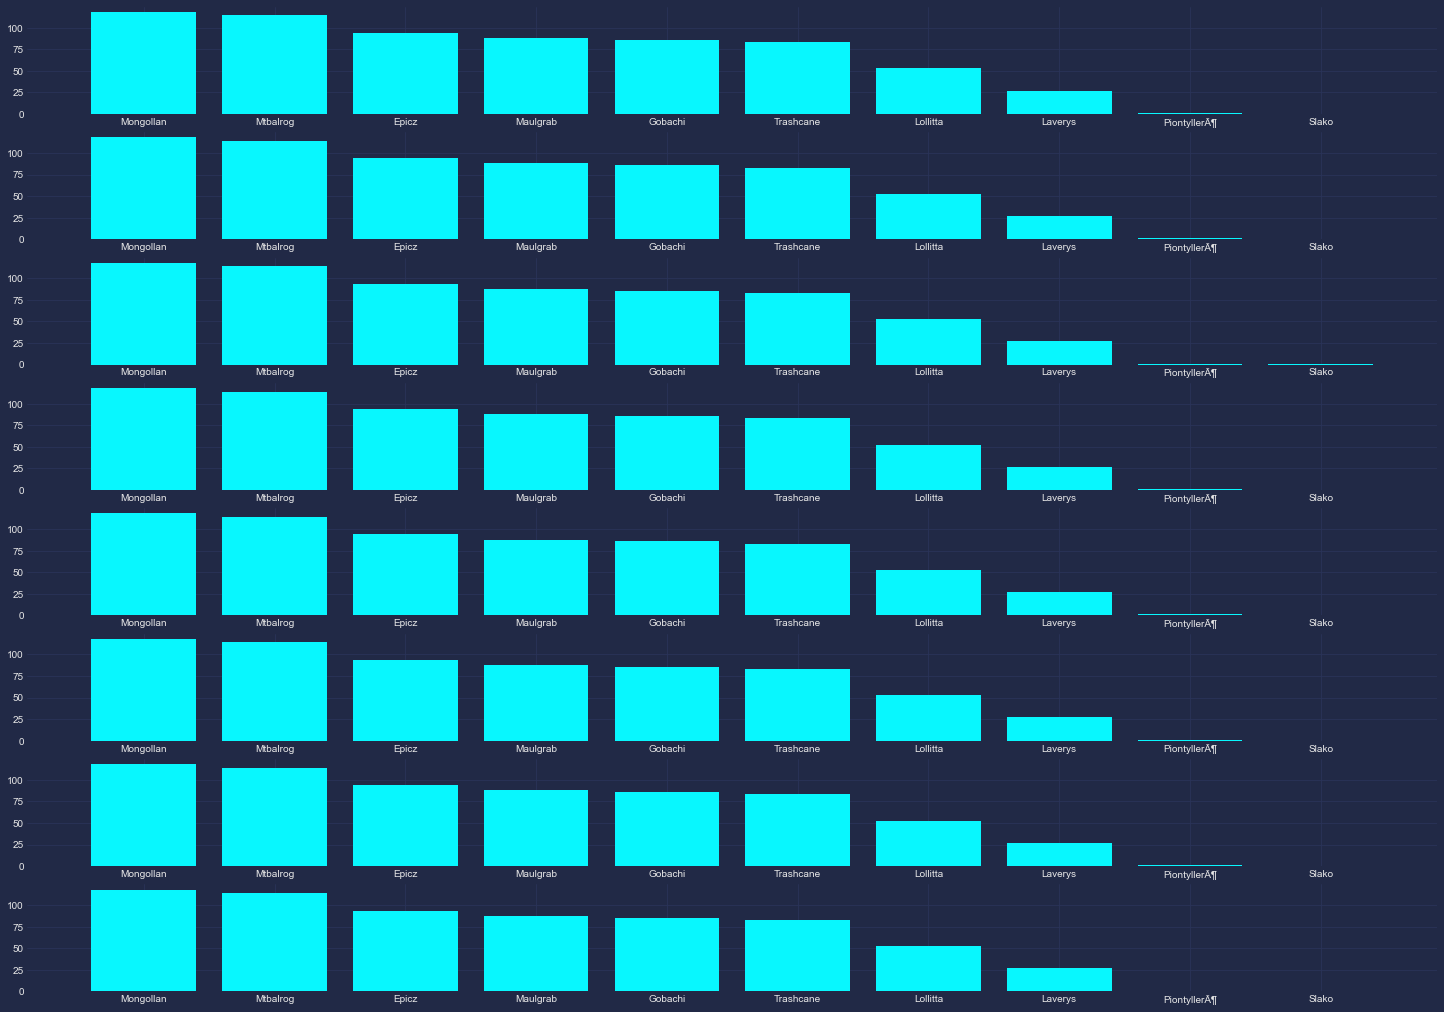

In [25]:
fig = plt.figure(figsize=(20,14))
axes = []
for i in range(1,1+size):
    axes.append(fig.add_subplot(size,1,i))
    encounter = next(iter(df_collection))
    axes[-1].bar(df_collection[encounter].index,df_collection[encounter]['amount'])
fig.tight_layout(pad=0.5)

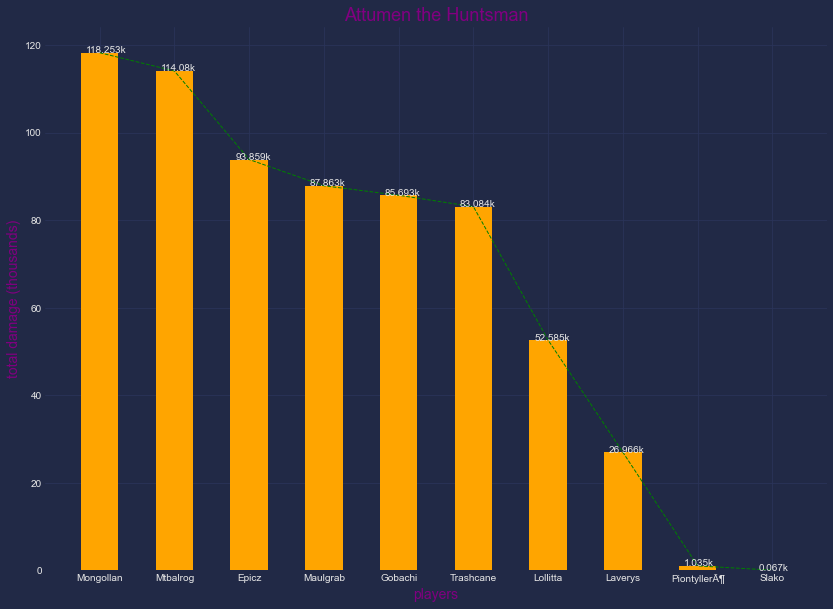

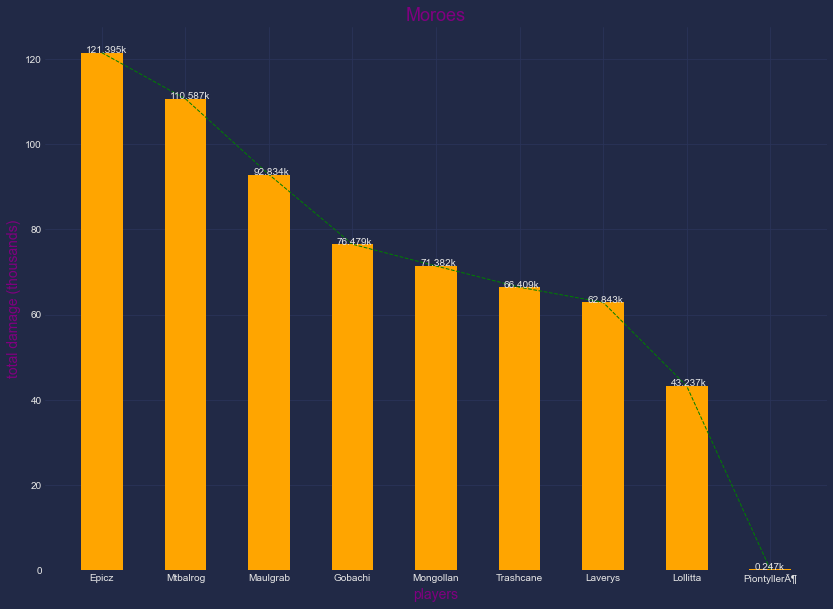

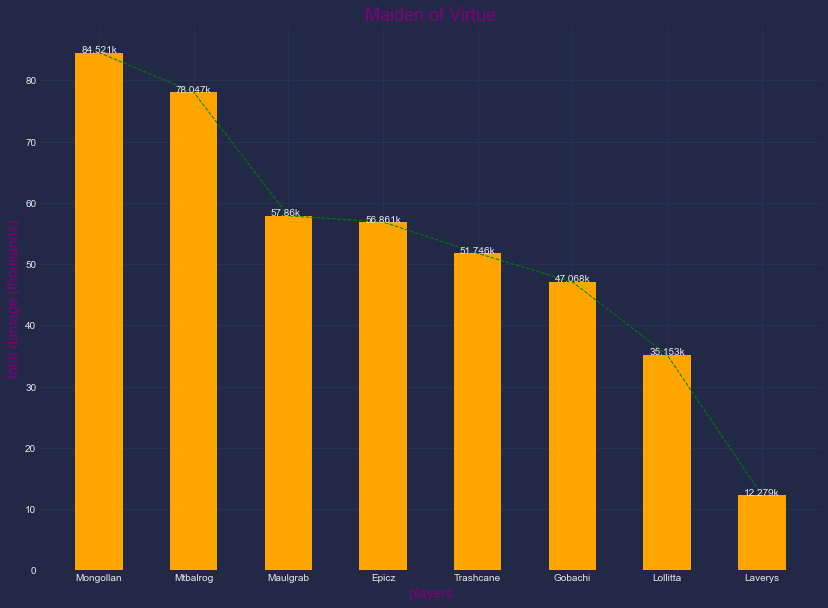

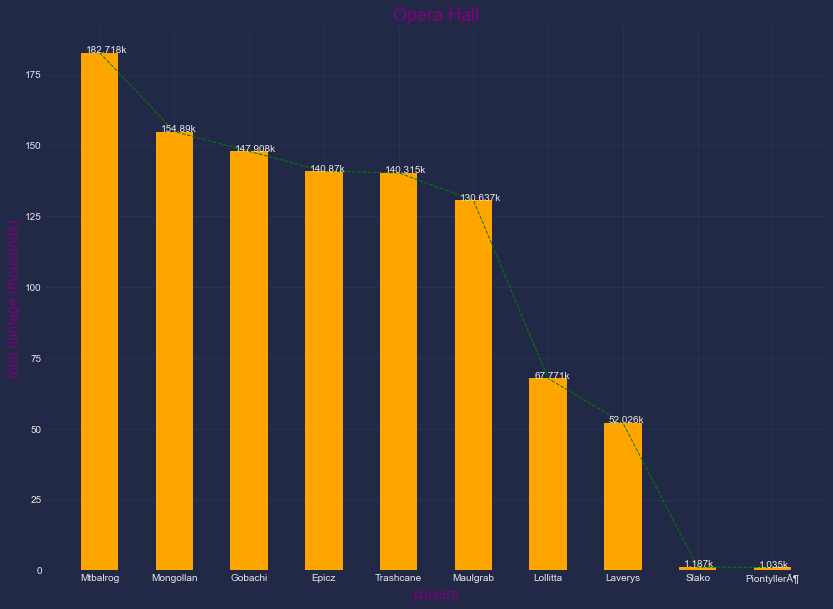

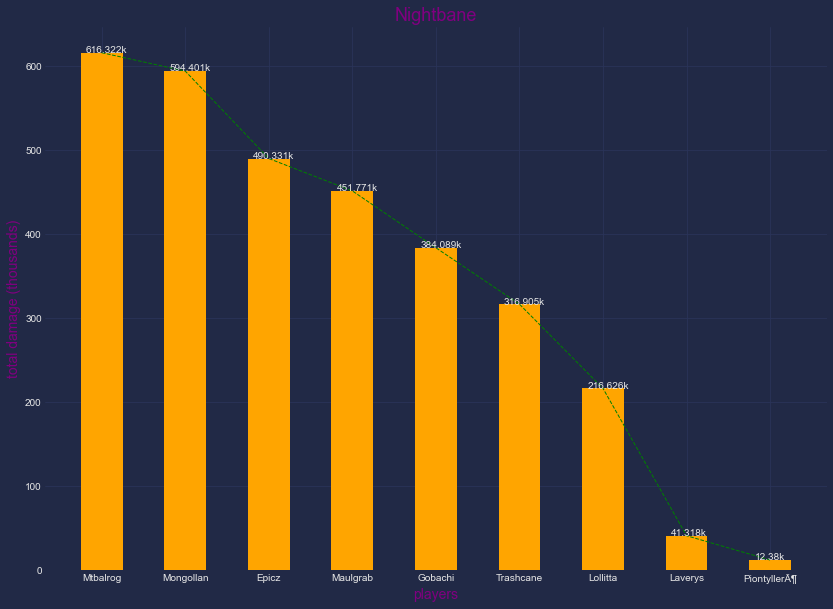

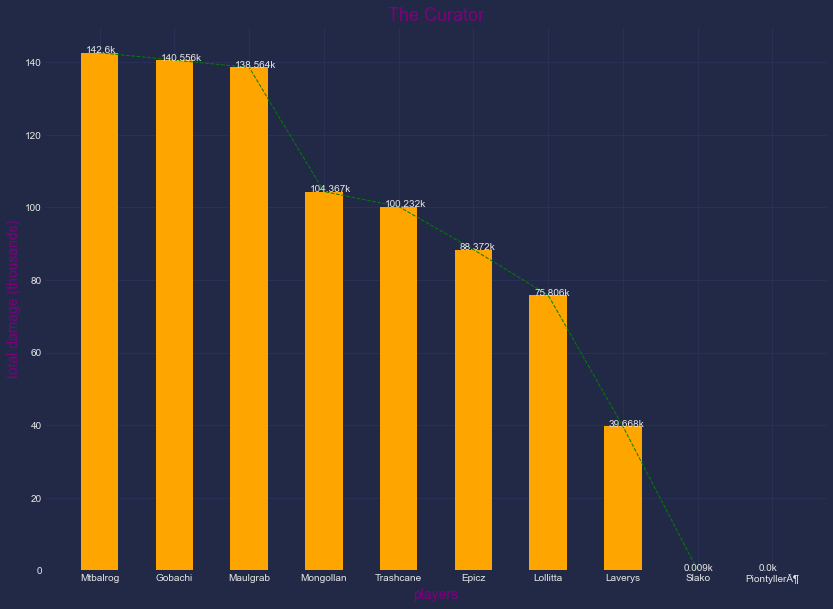

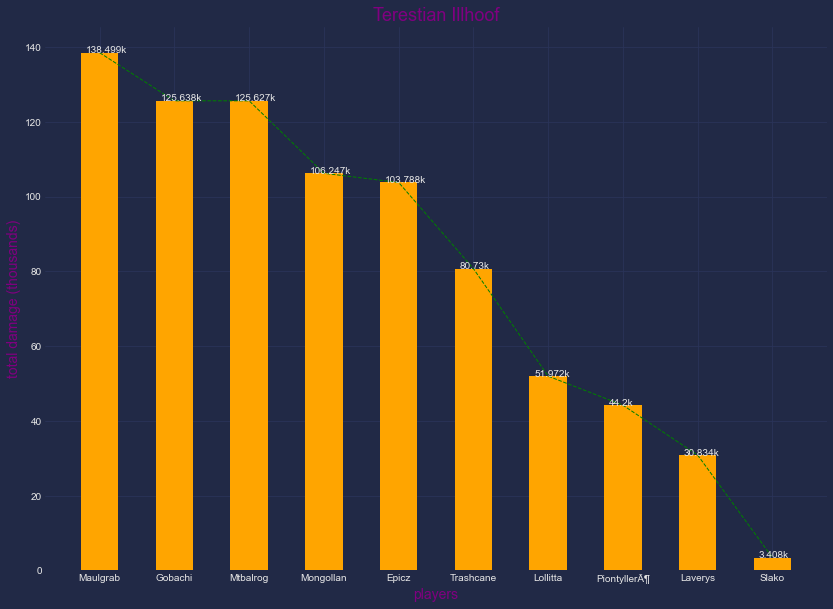

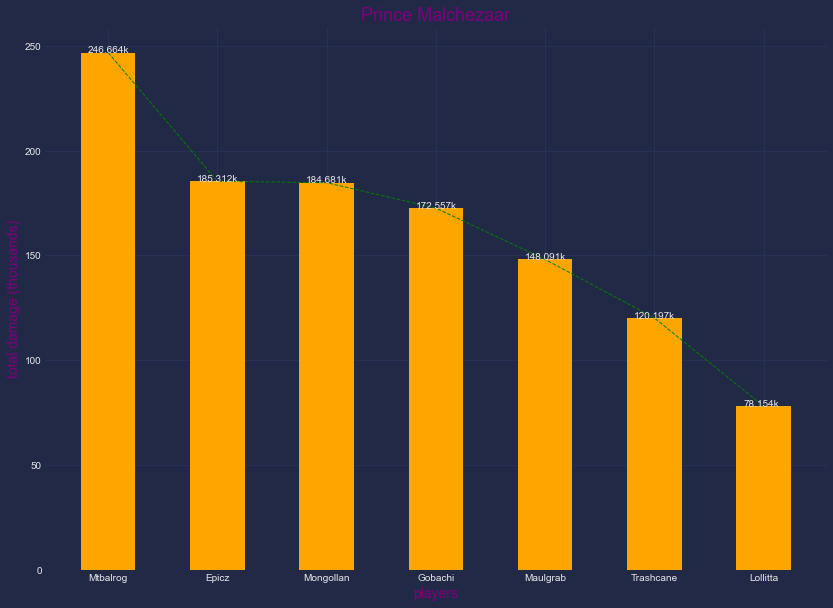

In [26]:
for i in range(1,1+size):
    fig = plt.figure(figsize=(14,10))
    fig.tight_layout()
    ax = fig.add_subplot(1,1,1)
    encounter = encounter_names[i-1]
    ax.bar(df_collection[encounter].index,
           df_collection[encounter]['amount'],
           color = 'orange',
           width = 0.5,
           zorder=1)
    
    
    ###### SET VALUES ABOVE BARS
    cnt = 0
    for patch in ax.patches:
        ax.text(patch.get_x() + patch.get_width()/8,
                df_collection[encounter]['amount'][cnt],
                '{}k'.format(df_collection[encounter]['amount'][cnt],
                color = 'red',
                font = 12)
               )
        cnt += 1
        
    ###########PLOT
    ax.plot([patch.get_x()+patch.get_width()/2 for patch in ax.patches],
            [df_collection[encounter]['amount'][cnt] for cnt in range(len(ax.patches))],
            color = 'green',
            linestyle = '--',
            zorder=2,
            lw = 1.0)
    
    
    ######SET LABEL/TITLE NAMES
    ax.set_title(encounter)
    ax.set_ylabel('total damage (thousands)')
    ax.set_xlabel('players')
    
    ########SET LABEL/TITLE COLORS
    ax.title.set_color('purple')
    ax.xaxis.label.set_color('purple')
    ax.yaxis.label.set_color('purple')
    
    #######SET LABEL/TITLE SIZES
    ax.xaxis.label.set_size('14')
    ax.yaxis.label.set_size('14')
    ax.title.set_size('18')
    
    
    ######SET LEGENDS
    

####Timestamps

In [27]:
df.columns

Index(['encounter_name', 'event_timestamp', 'event_type', 'category',
       'source_name', 'source_is_human', 'dest_name', 'dest_is_human',
       'spell_name', 'amount', 'raw_amount', 'combat_event', 'special',
       'overkill', 'rowID'],
      dtype='object')

In [28]:
import datetime

def transform_time(time):
    return datetime.datetime.strptime(time,'%Y-%m-%d %H:%M:%S.%f').timestamp()

In [29]:
df['event_timestamp'].iloc[0]

'2021-11-17 23:19:39.652'

In [30]:
encounter = encounter_names[0]
df[df['encounter_name'] == encounter].iloc[-1]

encounter_name        Attumen the Huntsman
event_timestamp    2021-11-17 23:21:22.791
event_type                    SPELL_DAMAGE
category                            Damage
source_name                   PiontyllerÃ¶
source_is_human                       True
dest_name             Attumen the Huntsman
dest_is_human                        False
spell_name                     Earth Shock
amount                                1035
raw_amount                            1035
combat_event                        Normal
special                                1.0
overkill                               1.0
rowID                                 1026
Name: 1025, dtype: object

In [31]:
players

array(['Epicz', 'Gobachi', 'Laverys', 'Lollitta', 'Maulgrab', 'Mongollan',
       'Mtbalrog', 'PiontyllerÃ¶', 'Slako', 'Trashcane'], dtype=object)

In [32]:
import math
import numpy as np
import typing
import functools
import time

In [33]:
def set_clock(func):
    """Perfomance benchmark: Prints time took to run the function."""
    @functools.wraps(func)
    def wrapper(*args,**kwargs):
        tik = time.perf_counter()
        result = func(*args,**kwargs)
        tak = time.perf_counter()
        print('Process completed in %s second(s).' % round(tak-tik,3))
        return result
    return wrapper
        
help(set_clock)

Help on function set_clock in module __main__:

set_clock(func)
    Perfomance benchmark: Prints time took to run the function.



In [34]:
###################Calculate Damage Per Second
@set_clock
def evaluate_dps(df) -> dict:
    dps_data = {}
    for encounter in encounter_names:
        df2 = df[df['encounter_name'] == encounter].copy()
        df2.reset_index(inplace=True)
        df2['time_in_combat'] = df2['event_timestamp'].apply(lambda x:transform_time(x))
        df2['time_in_combat'] = df2['time_in_combat'] - df2['time_in_combat'].iloc[0]
        bins = range(0, math.ceil(df2['time_in_combat'].max()) + 1 , 1 )
        df2['binned_data'] = pd.cut(df2['time_in_combat'],bins=bins)
        dps_data.update({encounter:dict()})
        for player in players:
            df3 = df2[df2['source_name'] == player].copy()
            grouped_data = df3[['amount','binned_data']].groupby('binned_data').sum()
            dps_data[encounter].update({player:grouped_data.sum()})         
    return dps_data
            
dps = evaluate_dps(df)

Process completed in 0.526 second(s).


In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
###ANOTHER APPROACH
@set_clock
def evaluate_damage(df) -> pd.DataFrame:
    df['time_in_combat'] = df['event_timestamp'].apply(lambda x: transform_time(x))
    grouped_data = df[['encounter_name','source_name','amount']].groupby(['encounter_name','source_name']).sum()
    return grouped_data

In [37]:
evaluate_damage(df)

Process completed in 0.16 second(s).


amount
encounter_name       source_name                 
Attumen the Huntsman Attumen the Huntsman   95086
                     Epicz                  93859
                     Gobachi                85693
                     Laverys                26966
                     Lollitta               52585
...                                           ...
The Curator          PiontyllerÃ¶               0
                     Shadowfiend             6612
                     Slako                      9
                     The Curator           143482
                     Trashcane             100232

[120 rows x 1 columns]

In [38]:
@set_clock
def evaluate_damage(df) -> pd.DataFrame:
    df['time_in_combat'] = df['event_timestamp'].apply(lambda x: transform_time(x))
    df2 = df[df['source_is_human'] == 1]
    grouped_data = df2[['source_name','encounter_name','amount']].groupby(
        ['encounter_name','source_name']).sum()/1000.0
    grouped_data = grouped_data.unstack().fillna(0)
    grouped_data['total'] = grouped_data.apply(lambda x:x.sum(),axis=1)
    return grouped_data

damage_data = evaluate_damage(df)
damage_data

Process completed in 0.158 second(s).


amount                                               \
source_name             Epicz  Gobachi Laverys Lollitta Maulgrab Mongollan   
encounter_name                                                               
Attumen the Huntsman   93.859   85.693  26.966   52.585   87.863   118.253   
Maiden of Virtue       56.861   47.068  12.279   35.153   57.860    84.521   
Moroes                121.395   76.479  62.843   43.237   92.834    71.382   
Nightbane             490.331  384.089  41.318  216.626  451.771   594.401   
Opera Hall            140.870  147.908  52.026   67.771  130.637   154.890   
Prince Malchezaar     185.312  172.557   0.000   78.154  148.091   184.681   
Terestian Illhoof     103.788  125.638  30.834   51.972  138.499   106.247   
The Curator            88.372  140.556  39.668   75.806  138.564   104.367   

                                                                total  
source_name          Mtbalrog PiontyllerÃ¶  Slako Trashcane            
encounter_name                                                         
Attumen the Huntsman  114.080        1.035  0.067    83.084   663.485  
Maiden of Virtue       78.047        0.000  0.000    51.746   423.535  
Moroes                110.587        0.247  0.000    66.409   645.413  
Nightbane             616.322       12.380  0.000   316.905  3124.143  
Opera Hall            182.718        1.035  1.187   140.315  1019.357  
Prince Malchezaar     246.664        0.000  0.000   120.197  1135.656  
Terestian Illhoof     125.627       44.200  3.408    80.730   810.943  
The Curator           142.600        0.000  0.009   100.232   830.174

In [39]:
type(damage_data)

pandas.core.frame.DataFrame

In [40]:
total = damage_data['total'].to_dict()
total

{'Attumen the Huntsman': 663.4850000000001,
 'Maiden of Virtue': 423.53499999999997,
 'Moroes': 645.413,
 'Nightbane': 3124.143,
 'Opera Hall': 1019.357,
 'Prince Malchezaar': 1135.656,
 'Terestian Illhoof': 810.943,
 'The Curator': 830.174}

In [41]:
damage_data.columns = [col[-1] for col in damage_data.columns]
damage_data.columns

Index(['Epicz', 'Gobachi', 'Laverys', 'Lollitta', 'Maulgrab', 'Mongollan',
       'Mtbalrog', 'PiontyllerÃ¶', 'Slako', 'Trashcane', ''],
      dtype='object')

In [42]:
damage_data = damage_data.iloc[:,:-1]

In [43]:
import matplotlib.patches as mpatches
import matplotlib as mpl

In [44]:
mylist = [1,2,3,4,5,7]
mylist[::2]

[1, 3, 5]

In [45]:
import random

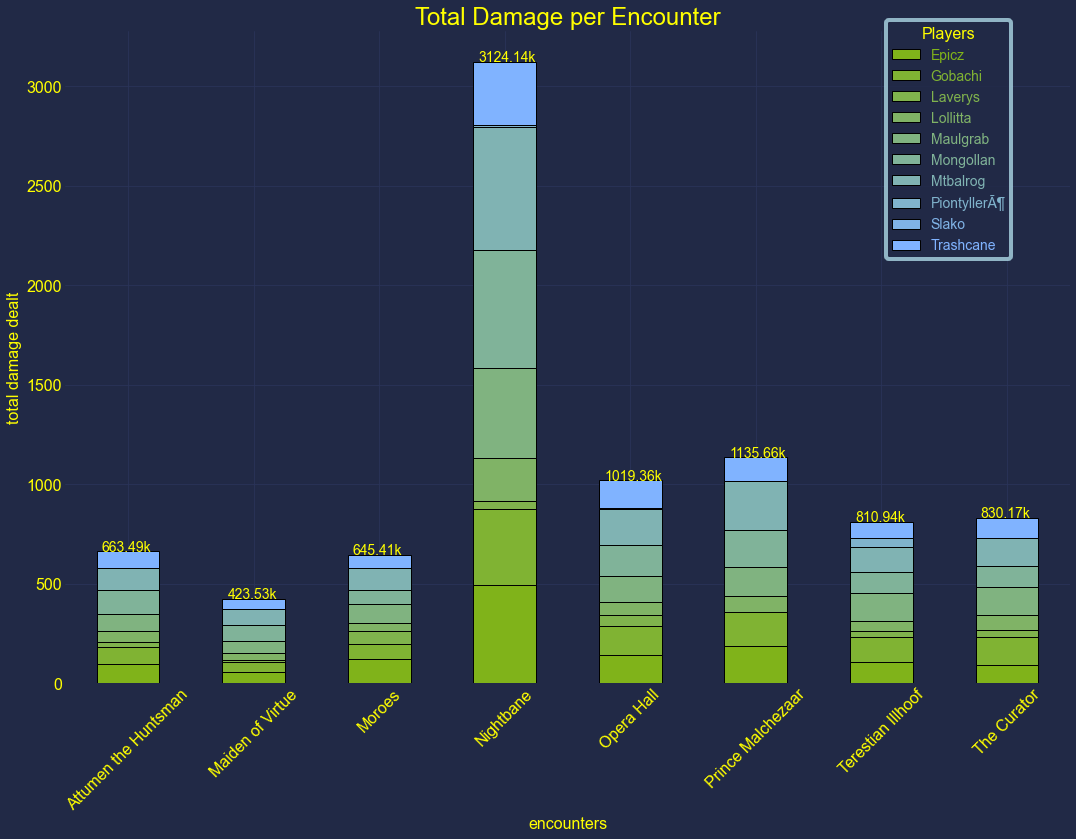

In [46]:
def color_gen(size):
    step = 1/float(size)
    return [(0.5,0.7,step*i) for i in range(1,1+size,1)]
    
colors = color_gen(len(players))
ax = damage_data.plot.bar(
                      figsize=(18,12),
                      stacked=True,
                      width=0.5,
                      color = colors,
                      edgecolor = 'black')
#####SETTING AXIS LABELS
ax.set_xlabel("encounters")
ax.set_ylabel("total damage dealt")
ax.set_title("Total Damage per Encounter")

#####SETTING LABEL COLOURS
ax.title.set_color('yellow')
ax.xaxis.label.set_color('yellow')
ax.yaxis.label.set_color('yellow')

####SETTING LABEL SIZES
ax.title.set_size('24')
ax.xaxis.label.set_size('16')
ax.yaxis.label.set_size('16')

#####SETTING TICKS
ax.tick_params(axis='x',labelcolor='yellow',labelsize=16,rotation=45)
ax.tick_params(axis='y',labelcolor='yellow',labelsize=16)

#####
cnt = 0
for patch in ax.patches:
    try:
        ax.text(patch.get_x() + patch.get_width()/12,
            list(total.values())[cnt],
            '{:1.2f}k'.format(list(total.values())[cnt]),
            color = 'yellow',
            size = '14'
           )
    except IndexError as error:
        break
    finally:
        cnt += 1


####CUSTOM LEGENDS
all_mpatches = []
f = lambda x:1
cnt = 0
for column in damage_data.columns:
    all_mpatches.append(mpatches.Patch(label = column[-1]))
    cnt += 1
# legends = [c for c in ax.get_children() if isinstance(c, mpl.legend.Legend)]

    
leg = ax.legend(prop = {'size':14},
                loc = 0,
                fancybox=True,
                frameon = True,
                title = 'Players',
                bbox_to_anchor = (0.86,0.9),
               labelcolor = 'linecolor',
               bbox_transform = plt.gcf().transFigure
               )
plt.setp(leg.get_title(),color='yellow',size=16)
leg.get_frame().set_edgecolor('lightblue')
leg.get_frame().set_linewidth(4)
# leg = ax.legend(handles = all_mpatches,
#                loc = 0,
#                prop = {'size':12},
#                fancybox = True,
#                frameon = True,
#                title = 'Players',
#                bbox_to_anchor = (1.0, 1.0))
# plt.setp(leg.get_title(),color='yellow',size=13)
# leg.get_frame().set_edgecolor('lightblue')
# leg.get_frame().set_linewidth(3)

## Cumulative Damage for a player

In [47]:
df.head()

,encounter_name,event_timestamp,event_type,category,source_name,source_is_human,dest_name,dest_is_human,spell_name,amount,raw_amount,combat_event,special,overkill,rowID,time_in_combat
0,Attumen the Huntsman,2021-11-17 23:19:39.652,SWING_DAMAGE,Damage,Midnight,False,Laverys,True,Auto Attack,4071,4071,Normal,0.0,1.0,1,1.637184e+09
1,Attumen the Huntsman,2021-11-17 23:19:39.652,SPELL_DAMAGE,Damage,Laverys,True,Midnight,False,Exorcism,876,876,Normal,1.0,1.0,2,1.637184e+09
2,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,305,305,Normal,0.0,1.0,3,1.637184e+09
3,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,372,372,Normal,0.0,1.0,4,1.637184e+09
4,Attumen the Huntsman,2021-11-17 23:19:40.135,SWING_DAMAGE,Damage,Maulgrab,True,Midnight,False,Auto Attack,261,261,Glancing Blow,0.0,1.0,5,1.637184e+09


In [48]:
player = 'Lollitta'
df3 = df[df['source_name'] == player].copy()
grouped_data = df3[['spell_name','amount','encounter_name']].groupby(['spell_name','encounter_name']).sum()
grouped_data = grouped_data[grouped_data['amount']>0].unstack(level=0).fillna(0)
grouped_data.columns = [col[-1] for col in grouped_data.columns]
grouped_data

,Auto Attack,Cleave,Deep Wound,Devastate,Execute,Hamstring,Heroic Strike,Revenge,Romulo's Poison,Shield Bash,Shield Slam,Shoot,Thunder Clap
encounter_name,,,,,,,,,,,,,
Attumen the Huntsman,9393.0,6764.0,2092.0,8385.0,0.0,0.0,12676.0,2902.0,0.0,0.0,10373.0,0.0,0.0
Maiden of Virtue,2918.0,0.0,885.0,7265.0,2016.0,0.0,13139.0,3499.0,0.0,0.0,5431.0,0.0,0.0
Moroes,9366.0,3481.0,1575.0,5829.0,0.0,0.0,8531.0,3041.0,0.0,0.0,10105.0,187.0,1122.0
Nightbane,46250.0,2015.0,4823.0,31467.0,0.0,47.0,58127.0,19614.0,2571.0,0.0,48744.0,228.0,2740.0
Opera Hall,20558.0,6629.0,3307.0,13273.0,0.0,0.0,6932.0,4271.0,0.0,311.0,12324.0,0.0,166.0
Prince Malchezaar,14540.0,0.0,2561.0,12908.0,0.0,0.0,25555.0,7666.0,1754.0,0.0,12426.0,0.0,744.0
Terestian Illhoof,7692.0,2739.0,1242.0,8684.0,9204.0,0.0,10491.0,2001.0,1042.0,0.0,8877.0,0.0,0.0
The Curator,8894.0,0.0,2212.0,15218.0,7447.0,0.0,23667.0,5240.0,889.0,0.0,12074.0,0.0,165.0


<AxesSubplot:xlabel='encounter_name'>

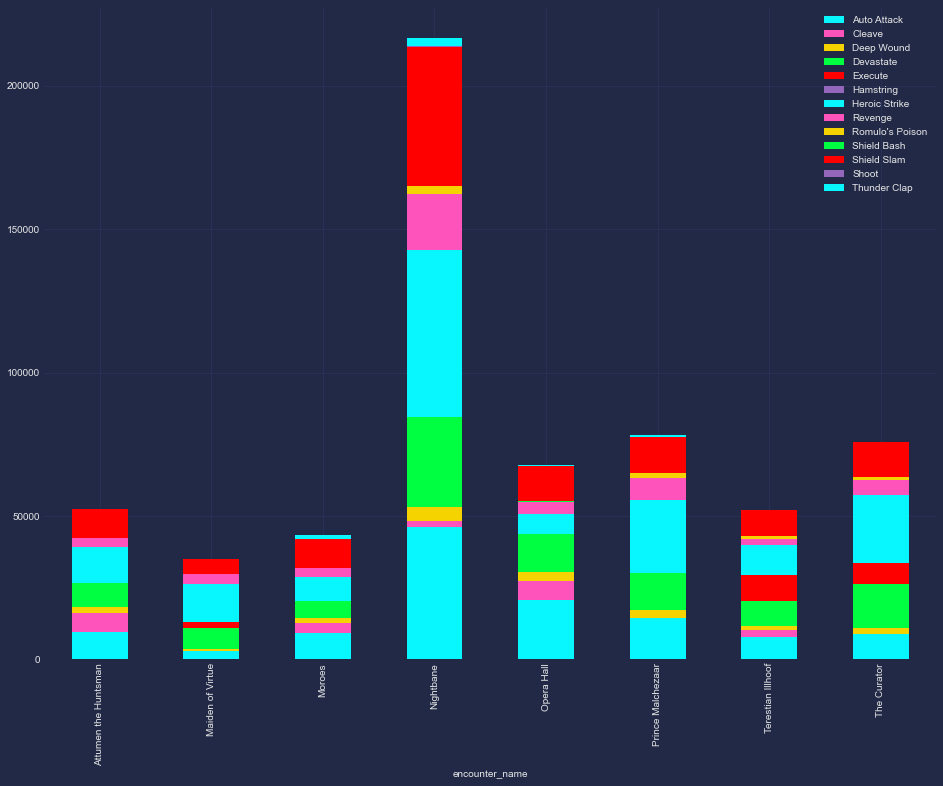

In [49]:
grouped_data.plot.bar(figsize = (16,12),stacked=True)

#### Stackplot - Cumulative Damage over Time for Each Spell

In [50]:
player = 'Lollitta'

def transform_damage(spell_name,x):
    return x[1] if spell_name == x[0] else 0.0

def fetch_subframe(source,df):
    df = df[df['source_name'] == source].copy()
    for encounter in df['encounter_name'].unique():
        df2 = df[df['encounter_name'] == encounter].copy()
        df2['time_in_combat'] = df2['time_in_combat'] - df2['time_in_combat'].iloc[0]
        spells = set()
        for spell in df['spell_name'].unique():
            df2[spell] = df2[['spell_name','amount']].apply(lambda x:transform_damage(spell,x),axis=1).cumsum()
            if df2[spell].iloc[-1]<=0:
                df2.drop(columns = [spell],inplace=True)
            else:
                spells.add(spell)
        yield df2 , spells
    

In [51]:
gen = fetch_subframe(player,df)
res = next(gen)
sf = res[0]
spells = res[1]
spells

{'Auto Attack',
 'Cleave',
 'Deep Wound',
 'Devastate',
 'Heroic Strike',
 'Revenge',
 'Shield Slam'}

In [52]:
num = len(spells)

In [53]:
sf.iloc[:,-num:]

,Auto Attack,Devastate,Shield Slam,Heroic Strike,Revenge,Cleave,Deep Wound
2,305.0,0.0,0.0,0.0,0.0,0.0,0.0
3,677.0,0.0,0.0,0.0,0.0,0.0,0.0
5,677.0,160.0,0.0,0.0,0.0,0.0,0.0
7,677.0,160.0,464.0,0.0,0.0,0.0,0.0
9,969.0,160.0,464.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
997,9393.0,7836.0,10373.0,12158.0,2902.0,6764.0,2007.0
1006,9393.0,8114.0,10373.0,12158.0,2902.0,6764.0,2007.0
1014,9393.0,8114.0,10373.0,12676.0,2902.0,6764.0,2007.0
1021,9393.0,8114.0,10373.0,12676.0,2902.0,6764.0,2092.0


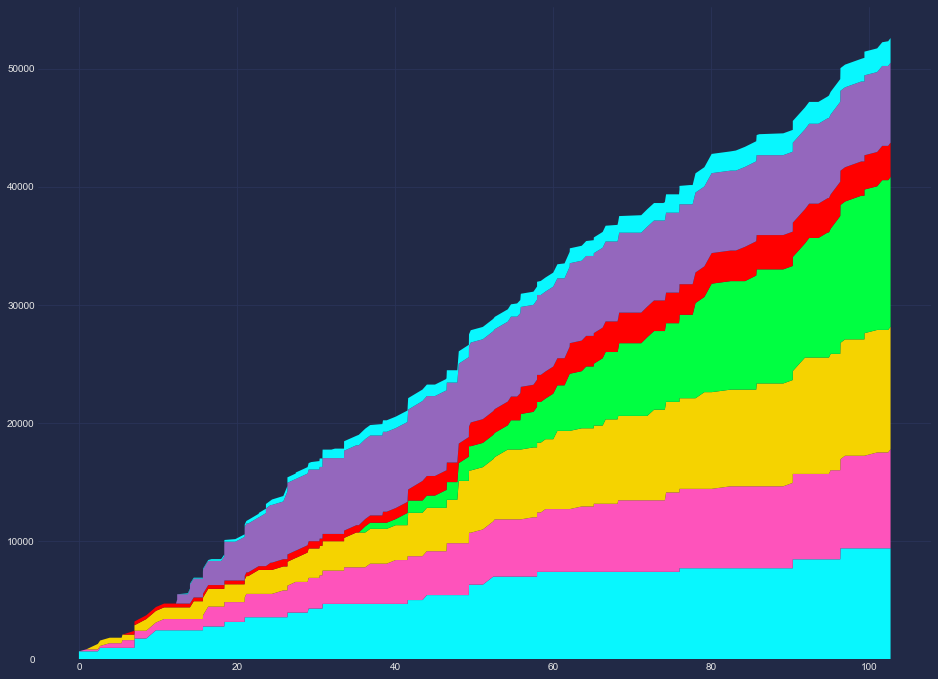

In [54]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1,1,1)
ax.stackplot(sf['time_in_combat'],sf.iloc[:,-num:].T)

### Delay between Auto Attacks

In [55]:
player = 'Lollitta'
encounter = df['encounter_name'].iloc[0]
dmg_df = df[(df['source_name']==player) & (df['encounter_name'] == encounter)].copy()
dmg_df.head()

,encounter_name,event_timestamp,event_type,category,source_name,source_is_human,dest_name,dest_is_human,spell_name,amount,raw_amount,combat_event,special,overkill,rowID,time_in_combat
2,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,305,305,Normal,0.0,1.0,3,1.637184e+09
3,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,372,372,Normal,0.0,1.0,4,1.637184e+09
5,Attumen the Huntsman,2021-11-17 23:19:40.582,SPELL_DAMAGE,Damage,Lollitta,True,Midnight,False,Devastate,160,160,Normal,1.0,1.0,6,1.637184e+09
7,Attumen the Huntsman,2021-11-17 23:19:42.062,SPELL_DAMAGE,Damage,Lollitta,True,Midnight,False,Shield Slam,464,464,Normal,1.0,1.0,8,1.637184e+09
9,Attumen the Huntsman,2021-11-17 23:19:42.362,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,292,292,Block,0.0,1.0,10,1.637184e+09


In [56]:
dmg_df['time_in_combat'] = dmg_df['time_in_combat'].apply(lambda x:x-dmg_df['time_in_combat'].iloc[0])
dmg_df.head(10)

,encounter_name,event_timestamp,event_type,category,source_name,source_is_human,dest_name,dest_is_human,spell_name,amount,raw_amount,combat_event,special,overkill,rowID,time_in_combat
2,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,305,305,Normal,0.0,1.0,3,0.000
3,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,372,372,Normal,0.0,1.0,4,0.000
5,Attumen the Huntsman,2021-11-17 23:19:40.582,SPELL_DAMAGE,Damage,Lollitta,True,Midnight,False,Devastate,160,160,Normal,1.0,1.0,6,0.912
7,Attumen the Huntsman,2021-11-17 23:19:42.062,SPELL_DAMAGE,Damage,Lollitta,True,Midnight,False,Shield Slam,464,464,Normal,1.0,1.0,8,2.392
9,Attumen the Huntsman,2021-11-17 23:19:42.362,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,292,292,Block,0.0,1.0,10,2.692
14,Attumen the Huntsman,2021-11-17 23:19:43.567,SPELL_DAMAGE,Damage,Lollitta,True,Midnight,False,Devastate,234,234,Normal,1.0,1.0,15,3.897
21,Attumen the Huntsman,2021-11-17 23:19:45.073,SPELL_MISSED,Damage,Lollitta,True,Midnight,False,Heroic Strike,0,0,Dodge,1.0,0.0,22,5.403
22,Attumen the Huntsman,2021-11-17 23:19:45.182,SPELL_DAMAGE,Damage,Lollitta,True,Midnight,False,Devastate,261,261,Normal,1.0,1.0,23,5.512
29,Attumen the Huntsman,2021-11-17 23:19:46.687,SPELL_DAMAGE,Damage,Lollitta,True,Midnight,False,Revenge,321,321,Normal,1.0,1.0,30,7.017
30,Attumen the Huntsman,2021-11-17 23:19:46.698,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,408,408,Normal,0.0,1.0,31,7.028


In [57]:
bins = np.arange(0,np.ceil(dmg_df['time_in_combat'].iloc[-1])+1,1)
dmg_df['binned'] = pd.cut(dmg_df['time_in_combat'],bins=bins)
grouped_dmg = dmg_df[['amount','binned']].groupby('binned').sum()
grouped_dmg.head(7)

,amount
binned,
"(0.0, 1.0]",160
"(1.0, 2.0]",0
"(2.0, 3.0]",756
"(3.0, 4.0]",234
"(4.0, 5.0]",0
"(5.0, 6.0]",261
"(6.0, 7.0]",0


In [58]:
dps = float(grouped_dmg.sum()/float(len(grouped_dmg)))
dps

503.9611650485437

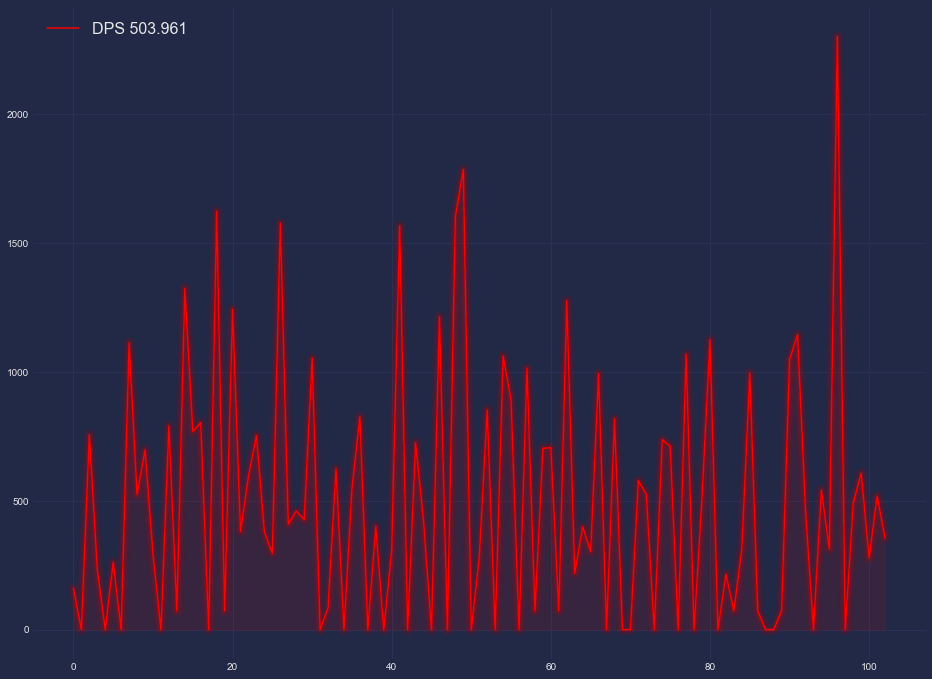

In [59]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(bins[:-1],grouped_dmg['amount'],color='red',label = 'DPS {:1.3f}'.format(dps))
ax.legend(loc=0,prop={'size':16})
mplcyberpunk.add_underglow()
mplcyberpunk.make_lines_glow()

## Regression?

### Gini Coef Calculation

In [108]:
incomes = [0,5e3,12e3,15e4,10e4,6e4,4e4,18e3,3e4]
incomes.sort()
incomes

[0, 5000.0, 12000.0, 18000.0, 30000.0, 40000.0, 60000.0, 100000.0, 150000.0]

In [138]:
import timeit
from typing import List, Union

def evaluate_gini(vals:List[Union[float,int]]) -> float:
    try:
        vals.sort()
        total = sum(vals)
        if vals[0] != 0:
            number_of_people = float(len(vals))
            temp = [0]
            temp.extend(vals)
            vals = temp.copy()
        else:
            old_vals = vals.copy()
            if vals.count(vals[0]) > 1:
                temp = [val for val in vals if val > 0.0]
                vals = [0]
                vals.extend(temp) 
            print(vals)
            number_of_people = float(len(vals)) - 1
        vals = [val/total for val in vals]
        vals = [sum(vals[:i]) for i in range(1,len(vals)+1,1)]
        return 1 - 2*sum([(i+j)/(2*number_of_people) for i , j in zip(vals[:-1],vals[1:])])
    except Exception as error:
        print(error)
        print(vals)
        print(old_vals)

In [134]:
evaluate_gini(incomes)

0.47921686746987957

In [135]:
timeit.Timer('evaluate_gini(incomes)','from __main__ import evaluate_gini , incomes').timeit(number = 100)

0.0008518000004187343

In [136]:
df.head()

,encounter_name,event_timestamp,event_type,category,source_name,source_is_human,dest_name,dest_is_human,spell_name,amount,raw_amount,combat_event,special,overkill,rowID,time_in_combat
0,Attumen the Huntsman,2021-11-17 23:19:39.652,SWING_DAMAGE,Damage,Midnight,False,Laverys,True,Auto Attack,4071,4071,Normal,0.0,1.0,1,1.637184e+09
1,Attumen the Huntsman,2021-11-17 23:19:39.652,SPELL_DAMAGE,Damage,Laverys,True,Midnight,False,Exorcism,876,876,Normal,1.0,1.0,2,1.637184e+09
2,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,305,305,Normal,0.0,1.0,3,1.637184e+09
3,Attumen the Huntsman,2021-11-17 23:19:39.670,SWING_DAMAGE,Damage,Lollitta,True,Midnight,False,Auto Attack,372,372,Normal,0.0,1.0,4,1.637184e+09
4,Attumen the Huntsman,2021-11-17 23:19:40.135,SWING_DAMAGE,Damage,Maulgrab,True,Midnight,False,Auto Attack,261,261,Glancing Blow,0.0,1.0,5,1.637184e+09


In [139]:
player = 'Lollitta'
player_data = df[df['source_name'] == player].copy()
spells = player_data['spell_name'].unique().tolist()
for spell in spells:
    player_data[spell] = player_data[['spell_name','amount']].apply(lambda x: transform_damage(spell,x),axis=1)
    
grouped_data = player_data[['spell_name','amount','encounter_name']].groupby(
    ['encounter_name','spell_name']).sum().unstack().fillna(0)
grouped_data.columns = [col[-1] for col in grouped_data.columns]

grouped_data['gini_coef'] = grouped_data.apply(lambda x:evaluate_gini(x.tolist()),axis=1)
grouped_data['total'] = grouped_data.apply(lambda x:x.sum()/1000.0,axis=1)
grouped_data

# for spell in spells:
#     if grouped_data[spell].sum()<=0:
#         print(spell)
#         grouped_data.drop(spell,1,inplace=True)
# grouped_data

[0, 2092.0, 2902.0, 6764.0, 8385.0, 9393.0, 10373.0, 12676.0]
[0, 885.0, 2016.0, 2918.0, 3499.0, 5431.0, 7265.0, 13139.0]
[0, 187.0, 1122.0, 1575.0, 3041.0, 3481.0, 5829.0, 8531.0, 9366.0, 10105.0]
[0, 47.0, 228.0, 2015.0, 2571.0, 2740.0, 4823.0, 19614.0, 31467.0, 46250.0, 48744.0, 58127.0]
[0, 166.0, 311.0, 3307.0, 4271.0, 6629.0, 6932.0, 12324.0, 13273.0, 20558.0]
[0, 744.0, 1754.0, 2561.0, 7666.0, 12426.0, 12908.0, 14540.0, 25555.0]
[0, 1042.0, 1242.0, 2001.0, 2739.0, 7692.0, 8684.0, 8877.0, 9204.0, 10491.0]
[0, 165.0, 889.0, 2212.0, 5240.0, 7447.0, 8894.0, 12074.0, 15218.0, 23667.0]


,Auto Attack,Cleave,Concussion Blow,Deep Wound,Demoralizing Shout,Devastate,Execute,Hamstring,Heroic Strike,Revenge,Romulo's Poison,Shield Bash,Shield Slam,Shoot,Taunt,Thunder Clap,gini_coef,total
encounter_name,,,,,,,,,,,,,,,,,,
Attumen the Huntsman,9393.0,6764.0,0.0,2092.0,0.0,8385.0,0.0,0.0,12676.0,2902.0,0.0,0.0,10373.0,0.0,0.0,0.0,0.267991,52.585268
Maiden of Virtue,2918.0,0.0,0.0,885.0,0.0,7265.0,2016.0,0.0,13139.0,3499.0,0.0,0.0,5431.0,0.0,0.0,0.0,0.404542,35.153405
Moroes,9366.0,3481.0,0.0,1575.0,0.0,5829.0,0.0,0.0,8531.0,3041.0,0.0,0.0,10105.0,187.0,0.0,1122.0,0.416845,43.237417
Nightbane,46250.0,2015.0,0.0,4823.0,0.0,31467.0,0.0,47.0,58127.0,19614.0,2571.0,0.0,48744.0,228.0,0.0,2740.0,0.580670,216.626581
Opera Hall,20558.0,6629.0,0.0,3307.0,0.0,13273.0,0.0,0.0,6932.0,4271.0,0.0,311.0,12324.0,0.0,0.0,166.0,0.462830,67.771463
Prince Malchezaar,14540.0,0.0,0.0,2561.0,0.0,12908.0,0.0,0.0,25555.0,7666.0,1754.0,0.0,12426.0,0.0,0.0,744.0,0.437290,78.154437
Terestian Illhoof,7692.0,2739.0,0.0,1242.0,0.0,8684.0,9204.0,0.0,10491.0,2001.0,1042.0,0.0,8877.0,0.0,0.0,0.0,0.347961,51.972348
The Curator,8894.0,0.0,0.0,2212.0,0.0,15218.0,7447.0,0.0,23667.0,5240.0,889.0,0.0,12074.0,0.0,0.0,165.0,0.470127,75.806470


In [157]:
grouped_perc = grouped_data.apply(lambda x:x*100/float(x[-2]*1000),axis=1)
grouped_perc

,Auto Attack,Cleave,Concussion Blow,Deep Wound,Demoralizing Shout,Devastate,Execute,Hamstring,Heroic Strike,Revenge,Romulo's Poison,Shield Bash,Shield Slam,Shoot,Taunt,Thunder Clap,gini_coef,total,tt
encounter_name,,,,,,,,,,,,,,,,,,,
Attumen the Huntsman,17.862417,12.862918,0.0,3.978301,0.0,15.945531,0.000000,0.000000,24.105611,5.518656,0.000000,0.000000,19.726057,0.000000,0.0,0.000000,0.000510,0.1,0.007535
Maiden of Virtue,8.300761,0.000000,0.0,2.517537,0.0,20.666562,5.734864,0.000000,37.376181,9.953517,0.000000,0.000000,15.449428,0.000000,0.0,0.000000,0.001151,0.1,0.010126
Moroes,21.661794,8.050897,0.0,3.642678,0.0,13.481379,0.000000,0.000000,19.730596,7.033260,0.000000,0.000000,23.370961,0.432496,0.0,2.594975,0.000964,0.1,0.008712
Nightbane,21.350104,0.930172,0.0,2.226412,0.0,14.525918,0.000000,0.021696,26.832811,9.054291,1.186835,0.000000,22.501394,0.105250,0.0,1.264849,0.000268,0.1,0.002483
Opera Hall,30.334302,9.781403,0.0,4.879635,0.0,19.584940,0.000000,0.000000,10.228494,6.302063,0.000000,0.458895,18.184645,0.000000,0.0,0.244941,0.000683,0.1,0.006221
Prince Malchezaar,18.604190,0.000000,0.0,3.276845,0.0,16.516017,0.000000,0.000000,32.698079,9.808784,2.244274,0.000000,15.899289,0.000000,0.0,0.951961,0.000560,0.1,0.005577
Terestian Illhoof,14.800178,5.270110,0.0,2.389732,0.0,16.708885,17.709417,0.000000,20.185734,3.850124,2.004912,0.000000,17.080237,0.000000,0.0,0.000000,0.000670,0.1,0.007602
The Curator,11.732508,0.000000,0.0,2.917957,0.0,20.074804,9.823700,0.000000,31.220290,6.912339,1.172723,0.000000,15.927400,0.000000,0.0,0.217660,0.000620,0.1,0.005710


<AxesSubplot:xlabel='tt', ylabel='gini_coef'>

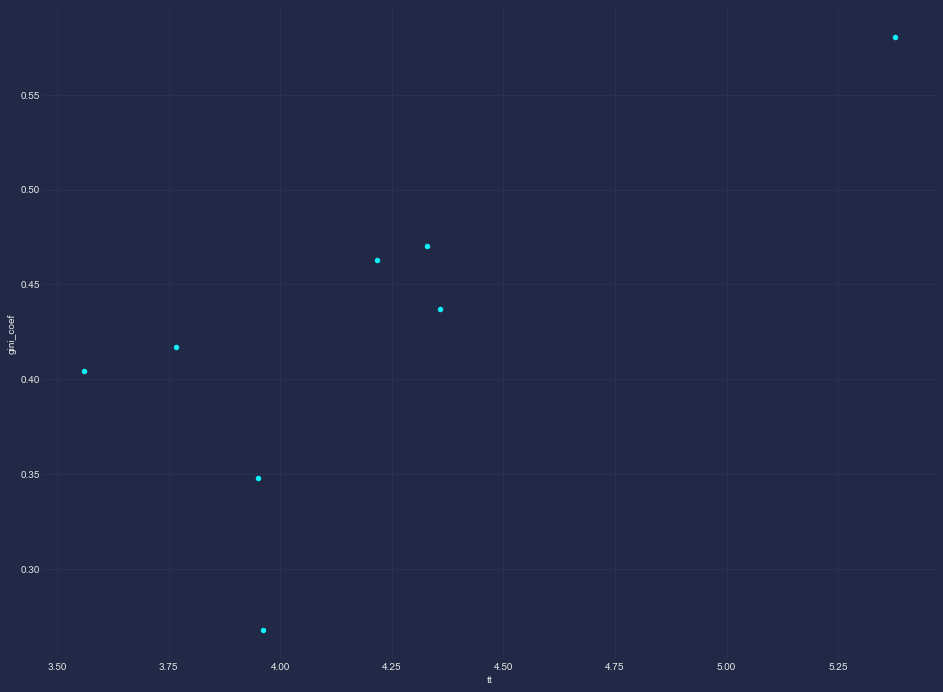

In [147]:
grouped_data['tt'] = grouped_data['total'].apply(lambda x:math.log(x))
grouped_data.plot.scatter(x='tt',y='gini_coef',figsize=(16,12))

In [1]:
dps_data = {}
for encounter in player_data['encounter_name'].unique():
    edf = player_data[player_data['encounter_name'] == encounter].copy()
    edf['time_in_combat'] = edf['time_in_combat'] - edf['time_in_combat'].iloc[0]
    ends = math.ceil(edf['time_in_combat'].max()) + 1
    bins = range(0,ends+1,1)
    edf['binned'] = pd.cut(edf['time_in_combat'],bins=bins)
    grouped = edf[['amount','binned']].groupby('binned').sum()
    total = float(grouped['amount'].sum())
    dps_data.update({encounter:total/float(ends)})
dps_data
    

NameError: name 'player_data' is not defined

In [64]:
import sys
import random
sys.getsizeof(object)
global vals
    
def test(list_length:int,runs:int):
    vals = [random.random()*10e5 for _ in range(list_length)]
    avg_exec_time = timeit.Timer(
        'evaluate_gini(vals)','from __main__ import evaluate_gini , vals').timeit(number = runs)
    return avg_exec_time

def benchmark(floor:int,threshold:int,runs:int=100):
    exec_data = dict()
    exec_data = {i:test(i,runs) for i in range(floor,threshold+1,1)}
    return exec_data

In [65]:
incomes[:len(incomes)-1]

[0, 5000.0, 12000.0, 18000.0, 30000.0, 40000.0, 60000.0, 100000.0]

In [66]:
total = sum(incomes)
incomes = [inc/total for inc in incomes]
incomes

[0.0,
 0.012048192771084338,
 0.02891566265060241,
 0.043373493975903614,
 0.07228915662650602,
 0.0963855421686747,
 0.14457831325301204,
 0.24096385542168675,
 0.3614457831325301]

In [67]:
cum = [sum(incomes[:i]) for i in range(1,len(incomes)+1,1)]
cum

[0.0,
 0.012048192771084338,
 0.04096385542168675,
 0.08433734939759036,
 0.1566265060240964,
 0.2530120481927711,
 0.3975903614457832,
 0.6385542168674699,
 1.0]

In [68]:
len(incomes)

9

In [69]:
area = sum([(i+j)/((len(incomes)-1)*2) for i , j in zip(cum[:-1],cum[1:])])
area

0.2603915662650602

In [70]:
gini = 1 - 2*area
gini

0.47921686746987957

In [71]:
x = [i*2+1 for i in range(10)]
total = sum(x)
total

100

In [72]:
x = [i/float(total) for i in x]
x

[0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19]

In [73]:
x = [sum(x[:i]) for i in range(1,11)]
x

[0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81, 1.0]

In [74]:
y = [0]
y.extend(x)
y

[0, 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81, 1.0]

In [75]:
sum([(i+j)/(10*2.0) for i , j in zip(y[:-1],y[1:])])

0.33499999999999996

In [76]:
list(zip(y[:-1],y[1:]))

[(0, 0.01),
 (0.01, 0.04),
 (0.04, 0.09),
 (0.09, 0.16),
 (0.16, 0.25),
 (0.25, 0.36),
 (0.36, 0.49),
 (0.49, 0.64),
 (0.64, 0.81),
 (0.81, 1.0)]

In [77]:
gini = (0.5 - sum([(i+j)/2 for i , j in zip(y[:-1],y[1:])]))/0.5
gini

-5.700000000000001

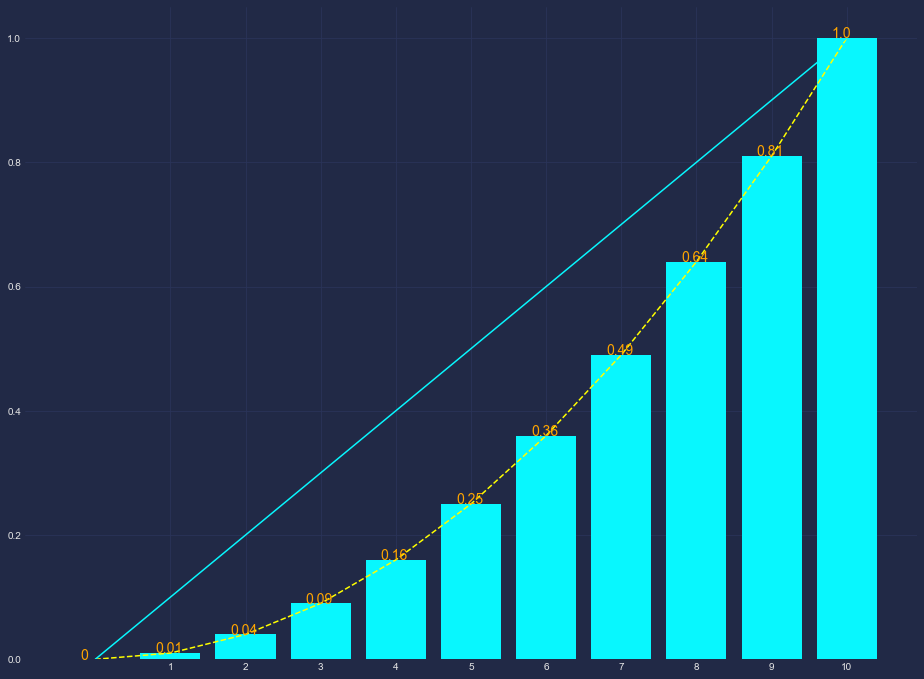

In [78]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1,1,1)
ax.bar(range(0,11,1),y)
cnt = 0
for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/4,y[cnt],'{}'.format(y[cnt]),color='orange',size=14)
    cnt += 1
ax.plot(range(0,11,1),y,color='yellow',zorder=2,linestyle='--')
ax.plot(range(0,11,1),[i/10 for i in range(11)])
ax.set_xticks(range(1,11,1))